<a href="https://colab.research.google.com/github/Zwarzen/PCVK_Genap_2022/blob/main/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection

metode yang digunakan :
1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection


In [4]:
# Import Lib
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
# akses drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Template Matching

menggunakan lib opencv:

cv.matchTemplate(), dengan param:

- image: citra input 
- templ: template yang dicari, ukuran tidak boleh lebih besar dari input
- method: metode dari template matching 

jenis metode template matching opencv: 
1. TM_SQDIFF
2. TM_SQDIFF_NORMED
3. TM_CCORR
4. TM_CCORR_NORMED
5. TM_CCOEFF
6. TM_CCOEFF_NORMED

In [3]:
from __future__ import print_function
import sys

## [global_variables]
use_mask = False
img = cv.imread('/content/drive/MyDrive/Object Detection/cats_and_bunnies.jpg')
templ = cv.imread('/content/drive/MyDrive/Images/Object Detection/cat2_templatejpg.jpg')
mask = np.zeros(img.shape, dtype = "uint8")
image_window = "Source Image"
result_window = "Result window"

match_method = 0
max_Trackbar = 5

## [global_variables]

def main(argv):

    if (len(sys.argv) < 3):
        print('Parameter Tidak cukup')
        print('Usage:\nmatch_template_demo.py <nama_gambar> <nama_template> [<nama_mask>]')
        return -1

    ## [load_image]
    global img
    global templ
    img = cv.imread(sys.argv[1], cv.IMREAD_COLOR)
    templ = cv.imread(sys.argv[2], cv.IMREAD_COLOR)

    if (len(sys.argv) > 3):
        global use_mask
        use_mask = True
        global mask
        mask = cv.imread( sys.argv[3], cv.IMREAD_COLOR )

    if ((img is None) or (templ is None) or (use_mask and (mask is None))):
        print('tidak bisa membaca gambar')
        return -1
    ## [load_image]

    ## [create_windows]
    cv.namedWindow( image_window, cv.WINDOW_AUTOSIZE )
    cv.namedWindow( result_window, cv.WINDOW_AUTOSIZE )
    ## [create_windows]

    ## [create_trackbar]
    trackbar_label = 'Method: \n 0: SQDIFF \n 1: SQDIFF NORMED \n 2: TM CCORR \n 3: TM CCORR NORMED \n 4: TM COEFF \n 5: TM COEFF NORMED'
    cv.createTrackbar( trackbar_label, image_window, match_method, max_Trackbar, MatchingMethod )
    ## [create_trackbar]

    MatchingMethod(match_method)

    ## [wait_key]
    cv.waitKey(0)
    return 0
    ## [wait_key]

def MatchingMethod(param):

    global match_method
    match_method = param

    ## [copy_source]
    img_display = img.copy()
    ## [copy_source]
    ## [match_template]
    method_accepts_mask = (cv.TM_SQDIFF == match_method or match_method == cv.TM_CCORR_NORMED)
    if (use_mask and method_accepts_mask):
        result = cv.matchTemplate(img, templ, match_method, None, mask)
    else:
        result = cv.matchTemplate(img, templ, match_method)
    ## [match_template]

    ## [normalize]
    cv.normalize( result, result, 0, 1, cv.NORM_MINMAX, -1 )
    ## [normalize]
    ## [best_match]
    _minVal, _maxVal, minLoc, maxLoc = cv.minMaxLoc(result, None)
    ## [best_match]

    ## [match_loc]
    if (match_method == cv.TM_SQDIFF or match_method == cv.TM_SQDIFF_NORMED):
        matchLoc = minLoc
    else:
        matchLoc = maxLoc
    ## [match_loc]

    ## [imshow]
    cv.rectangle(img_display, matchLoc, (matchLoc[0] + templ.shape[0], matchLoc[1] + templ.shape[1]), (0,0,0), 2, 8, 0 )
    cv.rectangle(result, matchLoc, (matchLoc[0] + templ.shape[0], matchLoc[1] + templ.shape[1]), (0,0,0), 2, 8, 0 )
    cv.imshow(image_window, img_display)
    cv.imshow(result_window, result)
    ## [imshow]
    pass

if __name__ == "__main__":
    main(sys.argv[1:])

tidak bisa membaca gambar


# Alternate Template Matching

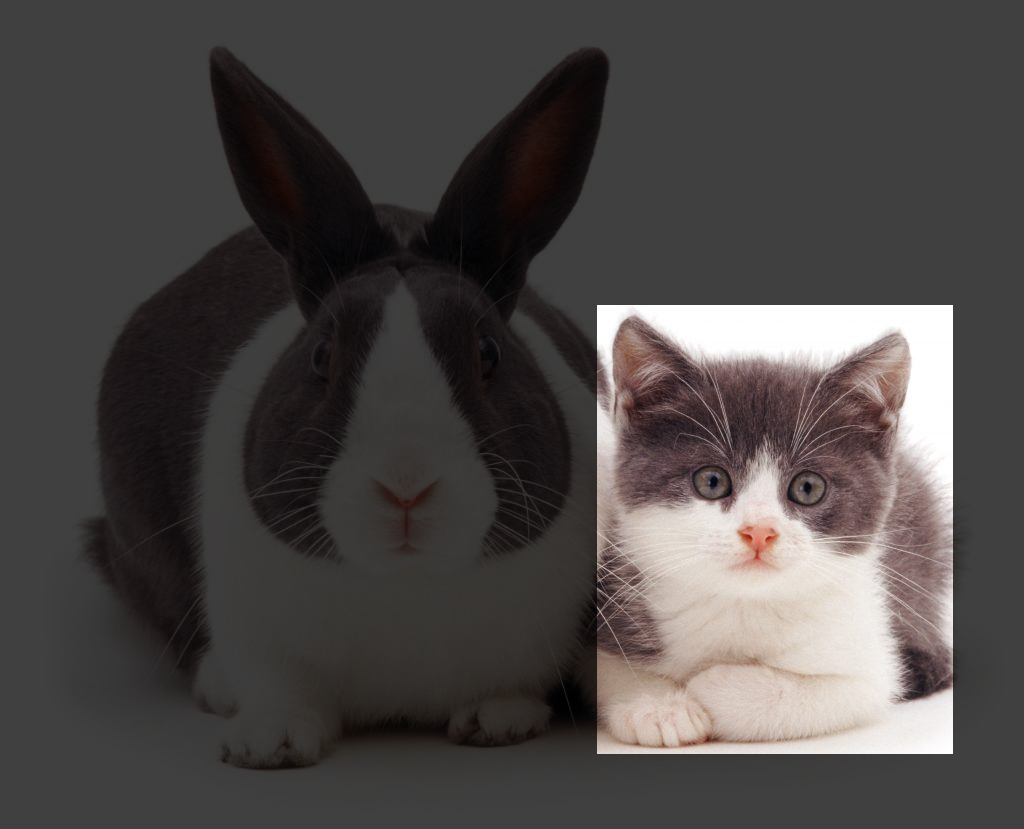

In [7]:
img = cv.imread('/content/drive/MyDrive/Images/Object Detection/cats_and_bunnies.jpg')
templ = cv.imread('/content/drive/MyDrive/Images/Object Detection/cat2_templatejpg.jpg')
(templateHeight, templateWidth) = templ.shape[:2]

matchResult = cv.matchTemplate(img, templ, cv.TM_CCOEFF)
(_, _, minLoc, maxLoc) = cv.minMaxLoc(matchResult)

topLeft = maxLoc
botRight = (topLeft[0] + templateWidth, topLeft[1] + templateHeight)
roi = img[topLeft[1]:botRight[1], topLeft[0]:botRight[0]]
 
mask = np.zeros(img.shape, dtype = "uint8")
img = cv.addWeighted(img, 0.25, mask, 0.75, 0)

img[topLeft[1]:botRight[1], topLeft[0]:botRight[0]] = roi
 
cv2_imshow(img)


# Harris Corner Detection


In [9]:
# img_chess = ('/content/drive/MyDrive/Images/Object Detection/chessboard.jpg')
# img_read1 = cv.imread(img_chess)
gray = cv.cvtColor("/content/drive/MyDrive/Images/Object Detection/chessboard.jpg", cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv.imshow('dst',img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

TypeError: ignored

# Shi-Tomasi Detection

In [ ]:
blox = cv.imread('/content/drive/MyDrive/Images/Object Detection/chessboard.jpg')
gray = cv.cvtColor(blox,cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(img,(x,y),3,255,-1)
plt.imshow(blox),plt.show()

error: ignored

# Hough Line Transform

In [ ]:
sudoku = cv.imread('/content/drive/MyDrive/Images/Object Detection/Sudoku.jpg')
gray = cv.cvtColor(sudoku,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)

lines = cv.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv.line(sudoku,(x1,y1),(x2,y2),(0,0,255),2)

cv.imwrite('houghlines3.jpg',sudoku)

NameError: ignored